In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
valid_n = [4 << i for i in range(15)]
valid_k = [2 << i for i in range(7)]

In [21]:
def gen_make_commands():
    CPU = True
   
    i = 1

    for n in valid_n:
        for k in valid_k:
            if CPU:
                print(f"$(CC) $(CFLAGS) -DNSAMPLES={n}  -DKCLASSES={k} obj/* $^ -o bin/$@-{i} -lm")
            else:
                print(f"$(CC) $(CFLAGS) -DNSAMPLES={n}  -DKCLASSES={k} obj/* $^ -o bin/$@-{i}")
            i += 1

    with open('run_tests.sh', 'w') as output:
        output.write('echo "N,K,Time(usec)" > test/results.csv\n')
        for j in range(1,i):
            output.write(f'./bin/int_test-{j} >> test/results.csv\n')
    
gen_make_commands()

$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=2 obj/* $^ -o bin/$@-1 -lm
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=4 obj/* $^ -o bin/$@-2 -lm
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=8 obj/* $^ -o bin/$@-3 -lm
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=16 obj/* $^ -o bin/$@-4 -lm
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=32 obj/* $^ -o bin/$@-5 -lm
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=64 obj/* $^ -o bin/$@-6 -lm
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=128 obj/* $^ -o bin/$@-7 -lm
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=2 obj/* $^ -o bin/$@-8 -lm
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=4 obj/* $^ -o bin/$@-9 -lm
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=8 obj/* $^ -o bin/$@-10 -lm
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=16 obj/* $^ -o bin/$@-11 -lm
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=32 obj/* $^ -o bin/$@-12 -lm
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=64 obj/* $^ -o bin/$@-13 -lm
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=128 obj/* $^ -o bin/$@-14 -lm
$(CC) $(CFLAGS) -DNSAMPLES=16  -D

In [22]:
df = pd.read_csv('cpu_results_1.csv')
df.groupby(by='N').describe()

K                                                    Time(usec)  \
      count       mean        std  min  25%   50%   75%    max      count   
N                                                                           
4       7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
8       7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
16      7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
32      7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
64      7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
128     7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
256     7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
512     7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
1024    7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
2048    7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
4096    7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
8192    7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
16384   5.0  24.400000  24.835459  2.0  8.0  16.0  32.0   64.0        5.0   
32768   7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   
65536   7.0  36.285714  45.875608  2.0  6.0  16.0  48.0  128.0        7.0   

                                                                     \
               mean           std        min        25%         50%   
N                                                                     
4      1.375271e+04  9.862692e+03     2479.0     5745.0     11020.0   
8      6.831286e+03  7.920026e+03      688.0     1602.0      3518.0   
16     1.086757e+04  1.292000e+04     1059.0     2349.5      5117.0   
32     1.893929e+04  2.305444e+04     1715.0     3870.0      8768.0   
64     3.459771e+04  4.288329e+04     3300.0     6531.5     15562.0   
128    6.543571e+04  8.159463e+04     6401.0    11990.0     29226.0   
256    1.258280e+05  1.572887e+05    12281.0    22263.0     56296.0   
512    2.477480e+05  3.069459e+05    27066.0    44023.5    109214.0   
1024   4.736920e+05  5.857869e+05    54809.0    90591.5    197903.0   
2048   9.356124e+05  1.172987e+06   108666.0   173363.0    374736.0   
4096   1.898581e+06  2.372292e+06   206729.0   350676.5    825115.0   
8192   3.586237e+06  4.489974e+06   398425.0   680892.0   1508961.0   
16384  4.639478e+06  4.430869e+06   803454.0  1572435.0   2914038.0   
32768  1.308388e+07  1.591153e+07  1552658.0  2628319.5   5411951.0   
65536  2.476508e+07  3.156489e+07  2749395.0  4995141.5  10415422.0   

                               
              75%         max  
N                              
4         22402.5     26475.0  
8          9002.0     22405.0  
16        14356.0     36486.0  
32        24561.5     65229.0  
64        44584.0    121091.0  
128       84051.0    230341.0  
256      162229.5    443234.0  
512      322986.5    863936.0  
1024     613420.0   1655109.0  
2048    1213946.5   3291266.0  
4096    2427298.0   6702277.0  
8192    4561320.5  12711850.0  
16384   6288600.0  11618863.0  
32768  17166775.0  45032348.0  
65536  30217137.5  89766173.0

In [23]:
df = pd.read_csv('cpu_results_1.csv')
df.groupby(by='K').describe()

N                                                                \
    count         mean           std  min   25%    50%     75%      max   
K                                                                         
2    15.0  8737.866667  18089.792599  4.0  48.0  512.0  6144.0  65536.0   
4    14.0  8191.714286  18643.887509  4.0  40.0  384.0  3584.0  65536.0   
8    15.0  8737.866667  18089.792599  4.0  48.0  512.0  6144.0  65536.0   
16   15.0  8737.866667  18089.792599  4.0  48.0  512.0  6144.0  65536.0   
32   15.0  8737.866667  18089.792599  4.0  48.0  512.0  6144.0  65536.0   
64   15.0  8737.866667  18089.792599  4.0  48.0  512.0  6144.0  65536.0   
128  14.0  8191.714286  18643.887509  4.0  40.0  384.0  3584.0  65536.0   

    Time(usec)                                                           \
         count          mean           std      min       25%       50%   
K                                                                         
2         15.0  3.952750e+05  7.786922e+05    688.0   2889.50   27066.0   
4         14.0  5.249616e+05  1.169756e+06   1197.0   4541.75   25976.5   
8         15.0  8.171793e+05  1.647075e+06   2007.0   7681.00   52787.0   
16        15.0  1.459123e+06  2.896797e+06   3518.0  13291.00  109214.0   
32        15.0  2.956246e+06  5.696523e+06   5788.0  25289.50  215208.0   
64        15.0  5.822282e+06  1.144349e+07  12216.0  45871.00  430765.0   
128       14.0  1.149756e+07  2.550454e+07  22405.0  79194.50  653585.0   

                             
            75%         max  
K                            
2     302577.00   2749395.0  
4     244337.50   4063696.0  
8     621743.00   5926587.0  
16   1167038.00  10415422.0  
32   2348752.00  19742787.0  
64   4639866.50  40691488.0  
128  5849524.25  89766173.0

Text(0.5, 1.0, 'CPU -- Time (sec) vs. Number of Sample Points for fixed K')

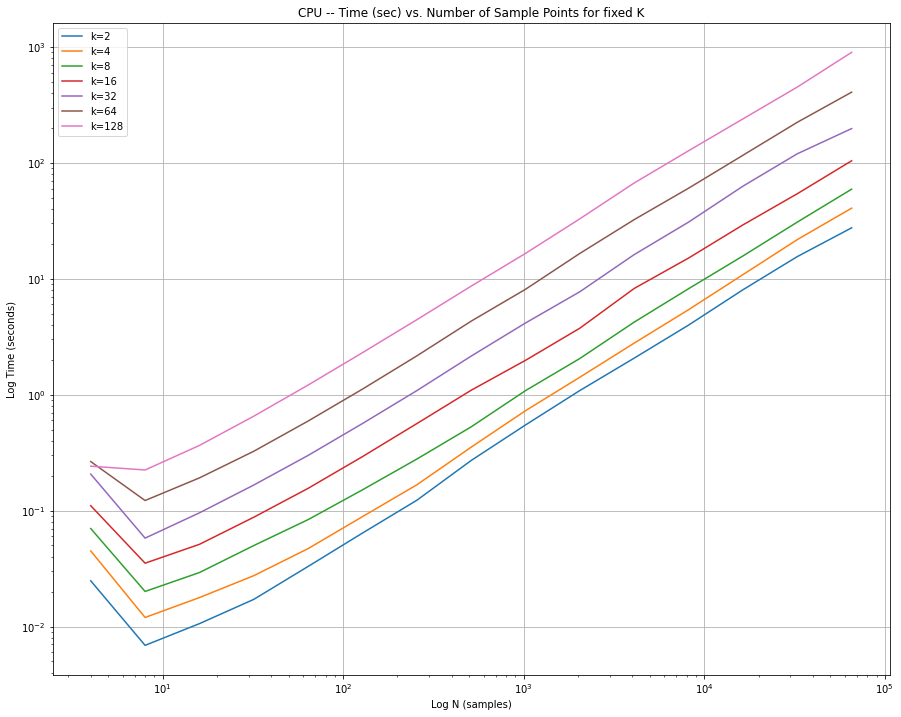

In [24]:
df = pd.read_csv('cpu_results_1.csv')
ns = df.groupby(by='N')
ks = []
plt.figure(figsize=(15, 12))

for i in valid_k:
    ks.append(df[df.K == i])

for p in ks:
    plt.subplot()
    plt.plot(p['N'], p['Time(usec)']/100000)

plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.legend(['k=2', 'k=4', 'k=8', 'k=16', 'k=32', 'k=64', 'k=128'])
plt.xlabel('Log N (samples)')
plt.ylabel('Log Time (seconds)')
plt.title('CPU -- Time (sec) vs. Number of Sample Points for fixed K')

Text(0.5, 1.0, 'CPU -- Time (sec) vs. Number of Sample Distributions for fixed N')

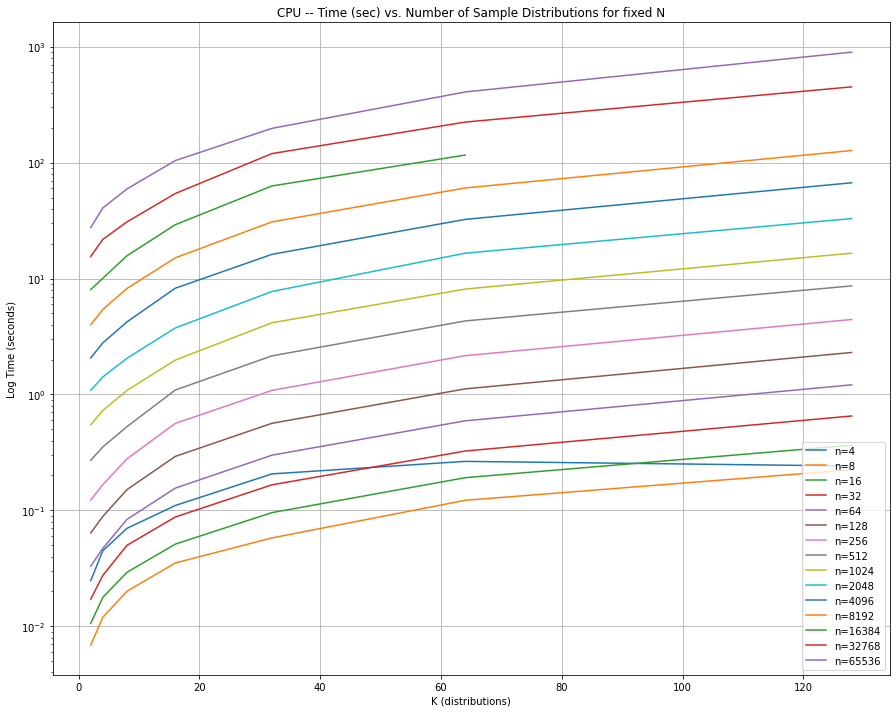

In [25]:
df = pd.read_csv('cpu_results_1.csv')
ks = df.groupby(by='K')
ns = []
for i in valid_n:
    ns.append(df[df.N == i])

ns

plt.figure(figsize=(15, 12))
for p in ns:
    plt.subplot()
    plt.plot(p['K'], p['Time(usec)']/100000)
plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('linear')
plt.legend(['n=4', 'n=8', 'n=16', 'n=32', 'n=64', 'n=128', 'n=256', 'n=512', 'n=1024', 'n=2048', 'n=4096', 'n=8192', 'n=16384', 'n=32768', 'n=65536'])
plt.xlabel('K (distributions)')
plt.ylabel('Log Time (seconds)')
plt.title('CPU -- Time (sec) vs. Number of Sample Distributions for fixed N')